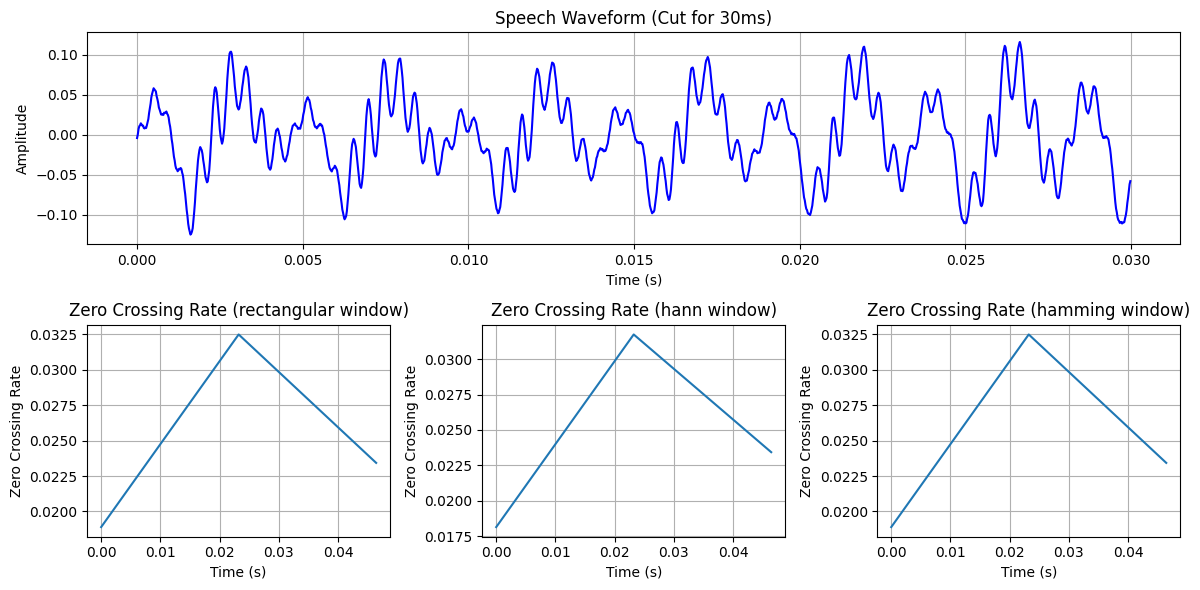

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# Load the audio file
audio_file = "ZeroCross.wav"
signal, sr = librosa.load(audio_file, sr=None)

# Play the audio
#display(Audio(signal, rate=sr))

# Cut a portion of the speech signal (for example, for 30 ms)
cut_signal = signal[int(sr * 2.5):int(sr * 2.53)]

# Parameters
frame_length = int(sr * 0.03)  # 30 ms frame length
hop_length = 512

# Compute zero-crossing rate (ZCR) for the cut portion with different window functions
window_functions = ['rectangular', 'hann', 'hamming']

plt.figure(figsize=(12, 6))

# Plot speech waveform
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, len(cut_signal) / sr, len(cut_signal)), cut_signal, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Speech Waveform (Cut for 30ms)')
plt.grid(True)

for i, window_function in enumerate(window_functions, start=1):
    # Compute window function
    if window_function == 'rectangular':
        window = np.ones(frame_length)
    else:
        window = librosa.filters.get_window(window_function, frame_length, fftbins=True)
    
    # Truncate window to match the length of the signal
    window = window[:len(cut_signal)]
    
    # Apply window to the signal
    signal_windowed = cut_signal * window
    
    # Compute zero-crossing rate (ZCR)
    zcr = librosa.feature.zero_crossing_rate(y=signal_windowed, frame_length=frame_length, hop_length=hop_length)
    
    plt.subplot(2, len(window_functions), len(window_functions) + i)
    plt.plot(librosa.frames_to_time(range(len(zcr[0])), hop_length=hop_length), zcr[0])
    plt.xlabel('Time (s)')
    plt.ylabel('Zero Crossing Rate')
    plt.title(f'Zero Crossing Rate ({window_function} window)')
    plt.grid(True)

plt.tight_layout()
plt.show()
